<a href="https://colab.research.google.com/github/kristina0614/Computer-Vision-Course/blob/main/ComputerVIsionAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set the Key and URL for API

In [30]:
visionURL = 'https://computervisionks.cognitiveservices.azure.com/'
visionKey = '21931e269a284df7bbdc84676d06361c'

ENDPOINT = 'https://computervisionks.cognitiveservices.azure.com/'
KEY = '21931e269a284df7bbdc84676d06361c'

### Explore Option using JSON

In [4]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO

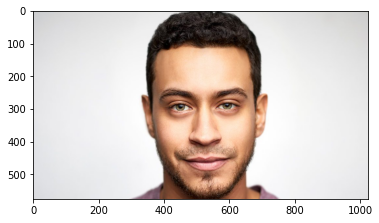

In [12]:
# img_url = 'https://www.uni-regensburg.de/Fakultaeten/phil_Fak_II/Psychologie/Psy_II/beautycheck/english/prototypen/w_sexy_gr.jpg'
img_url = 'https://i0.wp.com/post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_hero-1024x575.jpg?w=1155&h=1528' 
# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)	

In [13]:
# def get_image_features(img_url):
#     import http.client, urllib.request, urllib.parse, urllib.error, base64, json
#     headers = {
#         # Request headers.
#         'Content-Type': 'application/json',
#         'Ocp-Apim-Subscription-Key': visionKey,
#     }

#     params = urllib.parse.urlencode({
#         # Request parameters. All of them are optional.
#         'visualFeatures': 'Categories,Description,Color',
#         'language': 'en',
#     })

#     body = "{'url':'" + img_url + "'}"

#     try:
#         # Execute the REST API call and get the response.
#         conn = http.client.HTTPSConnection(visionURL)
#         conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
#         response = conn.getresponse()
#         data = response.read()

#         # 'data' contains the JSON response.
#         parsed = json.loads(data.decode("UTF-8"))
#         if response is not None:
#             return parsed
#         conn.close()
 
#     except Exception as e:
#         print('Error:')
#         print(e)

In [14]:
# jsonData = get_image_features(img_url)
# desc = jsonData['description']['captions'][0]['text']
# print(desc)	

Error:
nonnumeric port: '//computervisionks.cognitiveservices.azure.com/'


TypeError: ignored

In [10]:
import json
 
# View the full details returned
print (json.dumps(jsonData, sort_keys=True, indent=2))	

null


### Explore Option Using Azure Cognitive Services

In [16]:
pip install azure-cognitiveservices-vision-computervision

     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 


In [19]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

client = ComputerVisionClient(ENDPOINT, CognitiveServicesCredentials(KEY))

### First Image Example

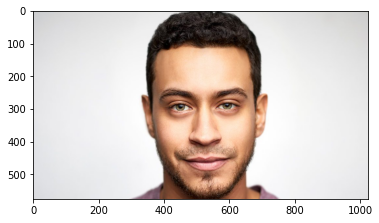

In [25]:
# img_url = 'https://www.uni-regensburg.de/Fakultaeten/phil_Fak_II/Psychologie/Psy_II/beautycheck/english/prototypen/w_sexy_gr.jpg'
img_url = 'https://i0.wp.com/post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_hero-1024x575.jpg?w=1155&h=1528' 
# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)	

In [26]:
description = client.describe_image(img_url)

In [27]:
for caption in description.captions:
  print(caption.text)

a man with a beard


In [28]:
face_results = client.analyze_image(img_url, ['faces'])

In [29]:
for face in face_results.faces:
  print('{} year old {}'.format(face.age, face.gender))
  print(face.face_rectangle.as_dict())

29 year old Male
{'left': 348, 'top': 194, 'width': 349, 'height': 349}


### Second Image Example

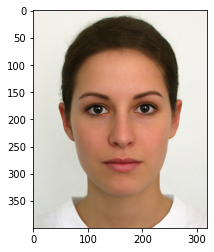

In [31]:
img_url = 'https://www.uni-regensburg.de/Fakultaeten/phil_Fak_II/Psychologie/Psy_II/beautycheck/english/prototypen/w_sexy_gr.jpg'
# img_url = 'https://i0.wp.com/post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_hero-1024x575.jpg?w=1155&h=1528' 
# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)	

In [32]:
description = client.describe_image(img_url)

In [33]:
for caption in description.captions:
  print(caption.text)

a person with short hair


In [34]:
face_results = client.analyze_image(img_url, ['faces'])

In [35]:
for face in face_results.faces:
  print('{} year old {}'.format(face.age, face.gender))
  print(face.face_rectangle.as_dict())

27 year old Female
{'left': 61, 'top': 127, 'width': 204, 'height': 204}
